# Importing The Packages

In [1]:
import os
from matplotlib import pyplot as plt
import cv2
import gif2numpy

In [3]:
train_path = "D:\\Data sets\\DRIVE\\training"
gt_ids = next(os.walk(train_path + "\\1st_manual"))[2]

In [4]:
gt_ids

['21_manual1.gif',
 '22_manual1.gif',
 '23_manual1.gif',
 '24_manual1.gif',
 '25_manual1.gif',
 '26_manual1.gif',
 '27_manual1.gif',
 '28_manual1.gif',
 '29_manual1.gif',
 '30_manual1.gif',
 '31_manual1.gif',
 '32_manual1.gif',
 '33_manual1.gif',
 '34_manual1.gif',
 '35_manual1.gif',
 '36_manual1.gif',
 '37_manual1.gif',
 '38_manual1.gif',
 '39_manual1.gif',
 '40_manual1.gif']

In [5]:
from skimage.filters import threshold_otsu

In [6]:
def gtImageDis(gt_path):
    frames, exts, image_specs = gif2numpy.convert(gt_path)
    frames = np.array(frames)
    labeled_img = frames.reshape(584, 565,3)
#     labeled_img_dis = cv2.cvtColor(labeled_img, cv2.COLOR_BGR2GRAY)
    return labeled_img

In [7]:
from tqdm import tqdm

In [8]:
th = []

# Calculating mean threshold

  0%|          | 0/20 [00:00<?, ?it/s]

D:\Data sets\DRIVE\training\1st_manual\21_manual1.gif


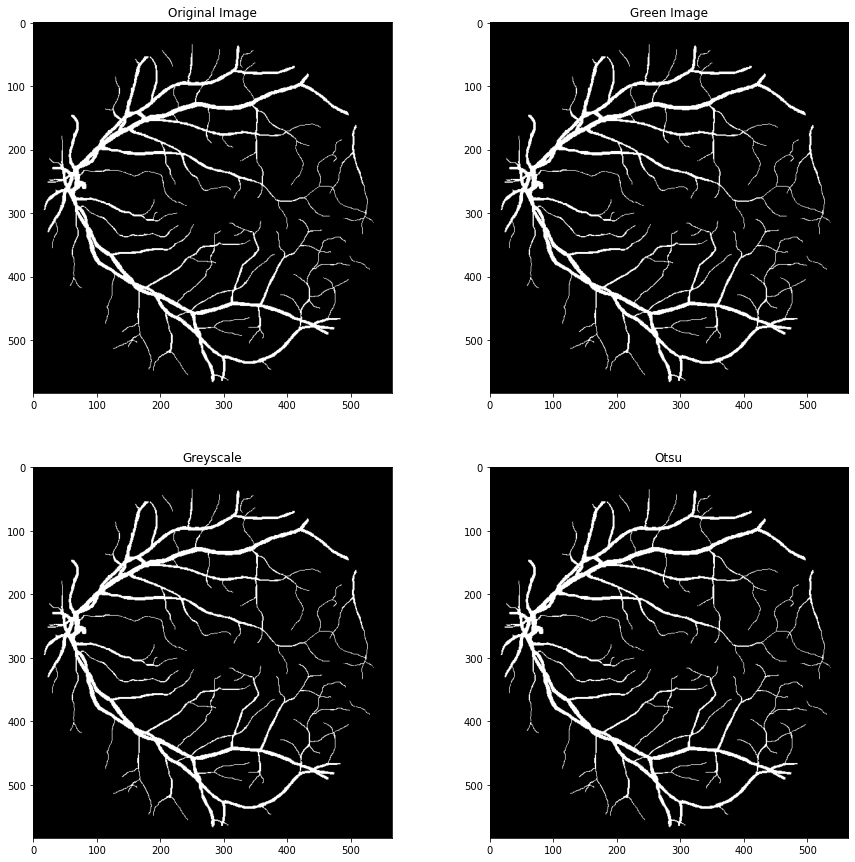

  5%|▌         | 1/20 [00:00<00:18,  1.04it/s]

D:\Data sets\DRIVE\training\1st_manual\22_manual1.gif


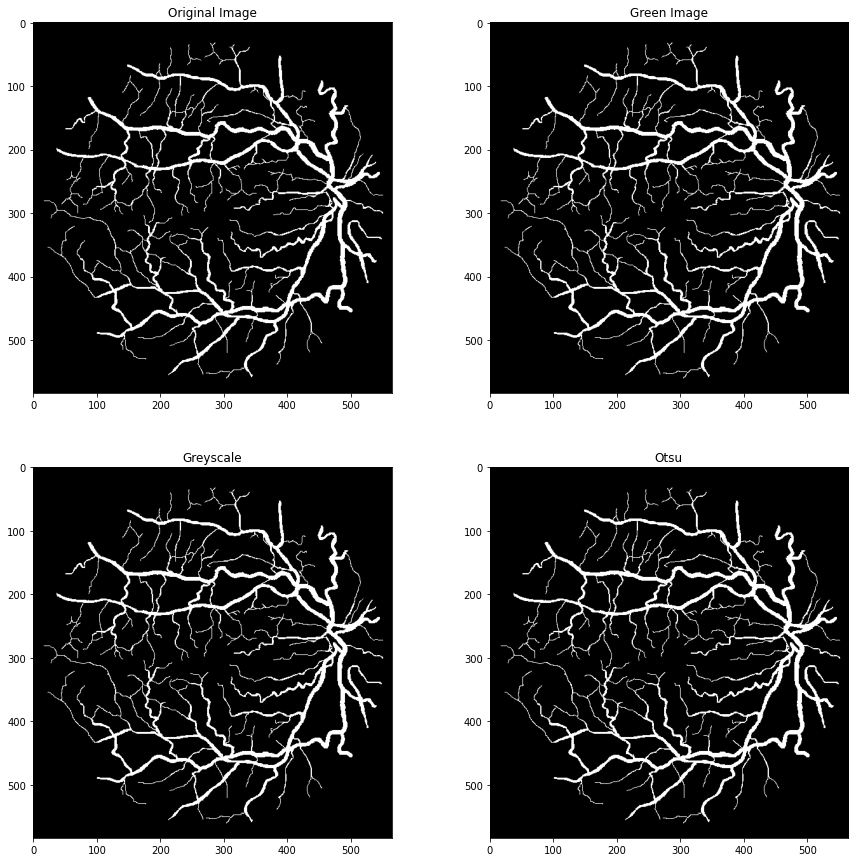

 10%|█         | 2/20 [00:01<00:15,  1.14it/s]

D:\Data sets\DRIVE\training\1st_manual\23_manual1.gif


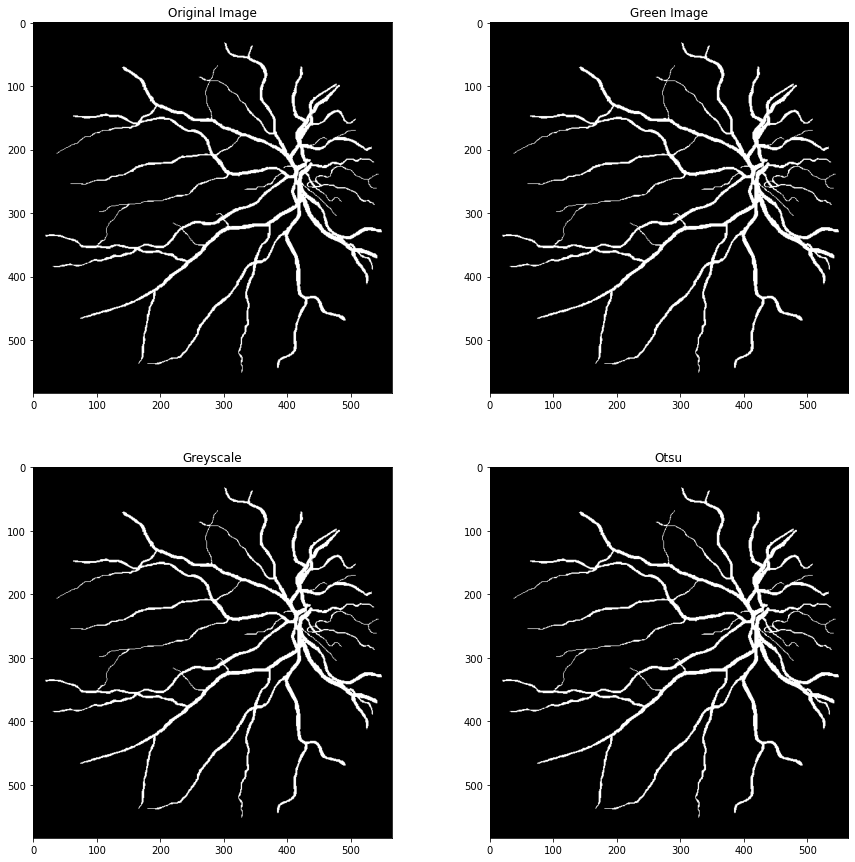

 15%|█▌        | 3/20 [00:02<00:14,  1.19it/s]

D:\Data sets\DRIVE\training\1st_manual\24_manual1.gif


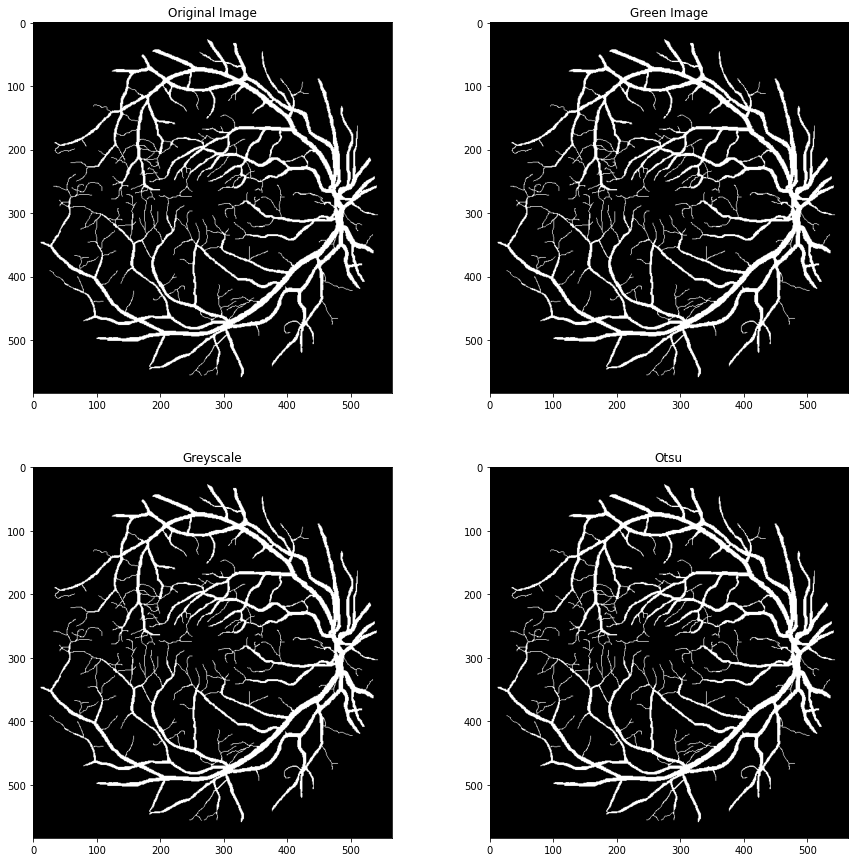

 20%|██        | 4/20 [00:03<00:13,  1.21it/s]

D:\Data sets\DRIVE\training\1st_manual\25_manual1.gif


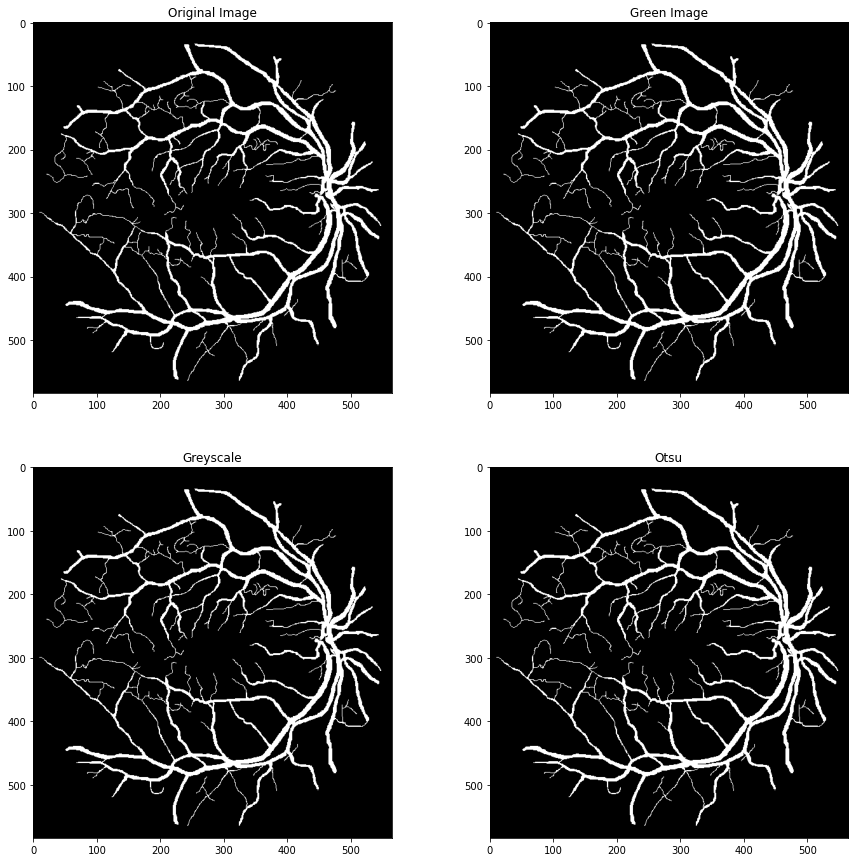

 25%|██▌       | 5/20 [00:04<00:12,  1.20it/s]

D:\Data sets\DRIVE\training\1st_manual\26_manual1.gif


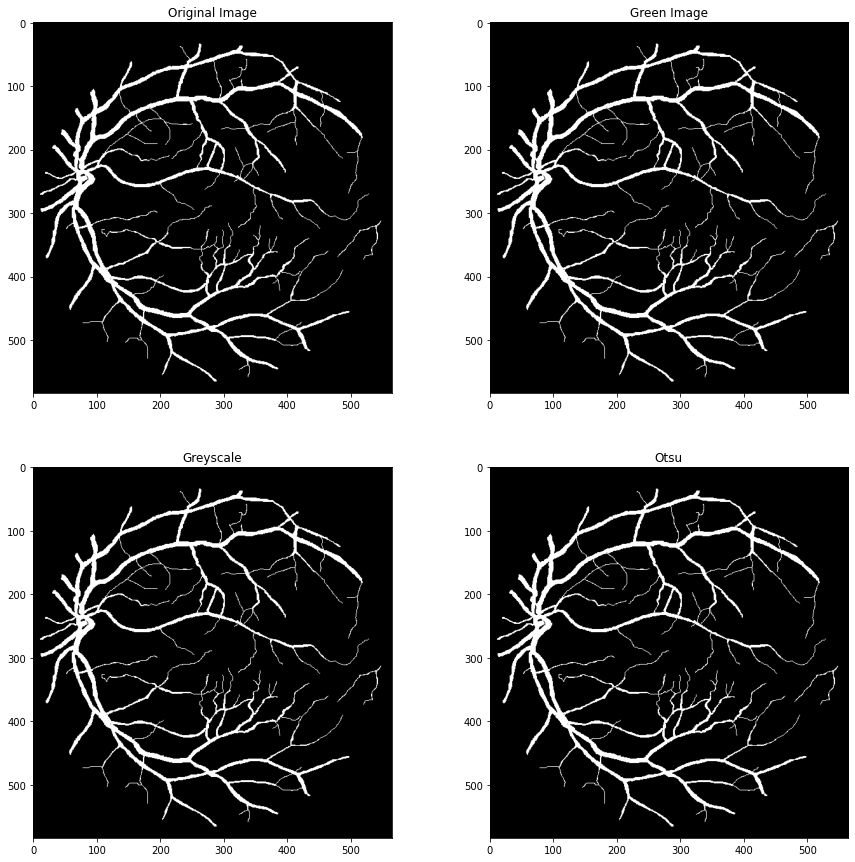

 30%|███       | 6/20 [00:05<00:11,  1.21it/s]

D:\Data sets\DRIVE\training\1st_manual\27_manual1.gif


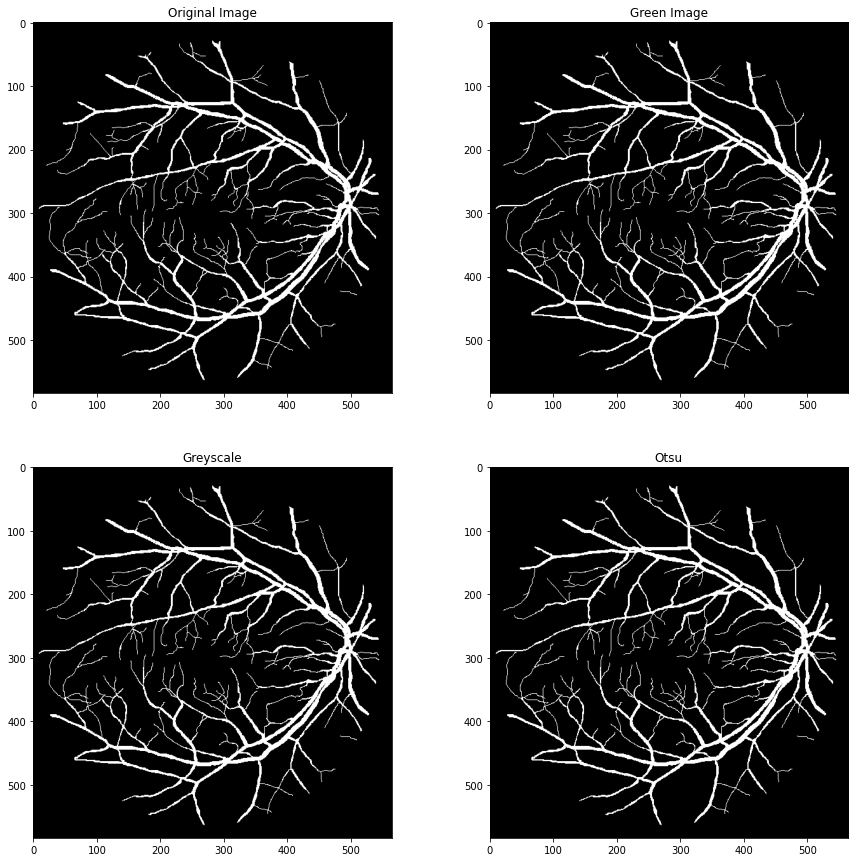

 35%|███▌      | 7/20 [00:05<00:10,  1.23it/s]

D:\Data sets\DRIVE\training\1st_manual\28_manual1.gif


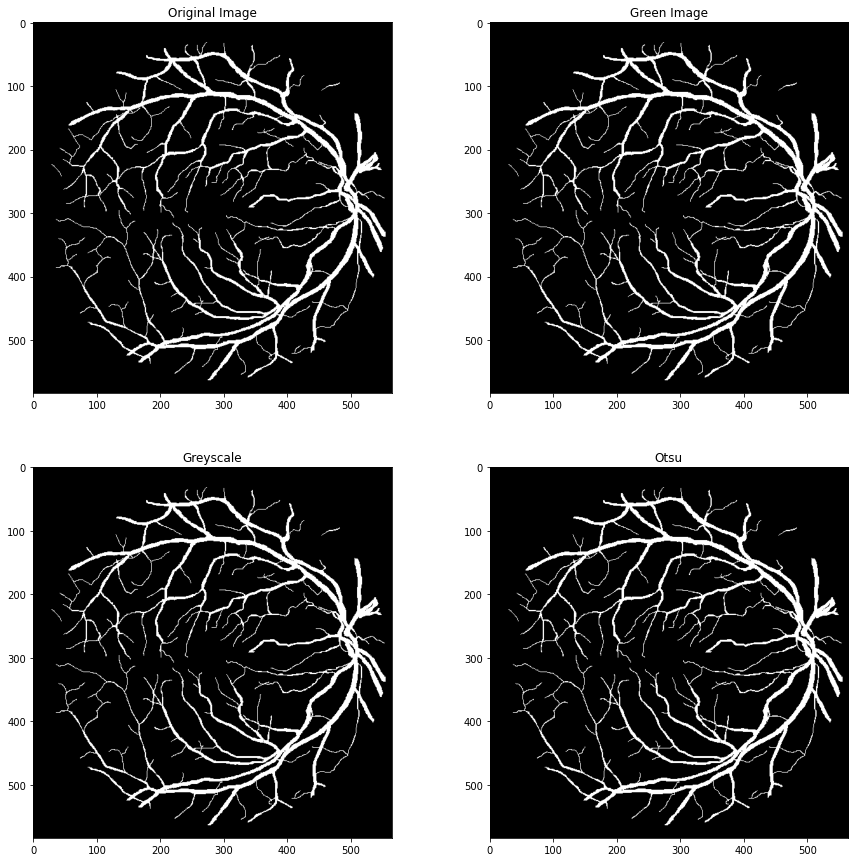

 40%|████      | 8/20 [00:06<00:09,  1.24it/s]

D:\Data sets\DRIVE\training\1st_manual\29_manual1.gif


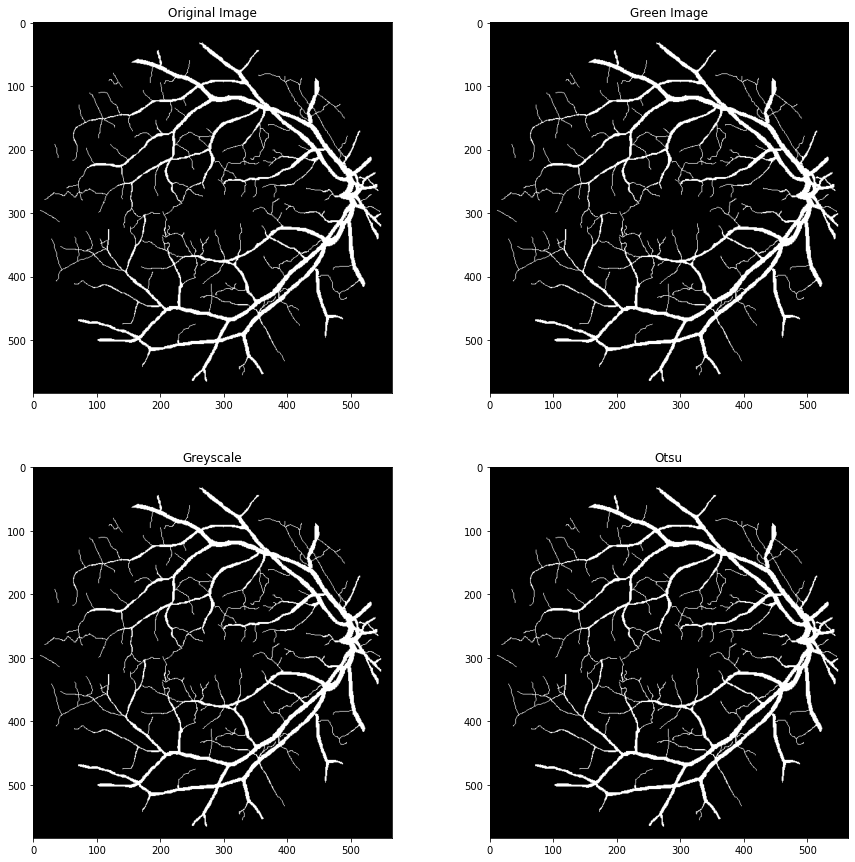

 45%|████▌     | 9/20 [00:07<00:09,  1.20it/s]

D:\Data sets\DRIVE\training\1st_manual\30_manual1.gif


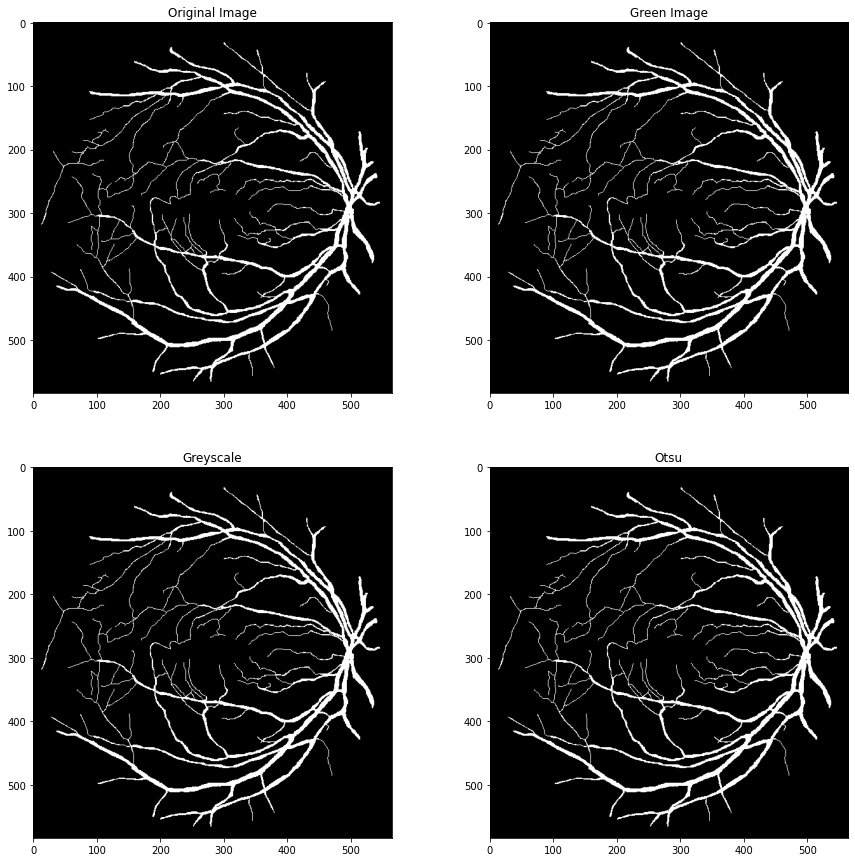

 50%|█████     | 10/20 [00:08<00:08,  1.22it/s]

D:\Data sets\DRIVE\training\1st_manual\31_manual1.gif


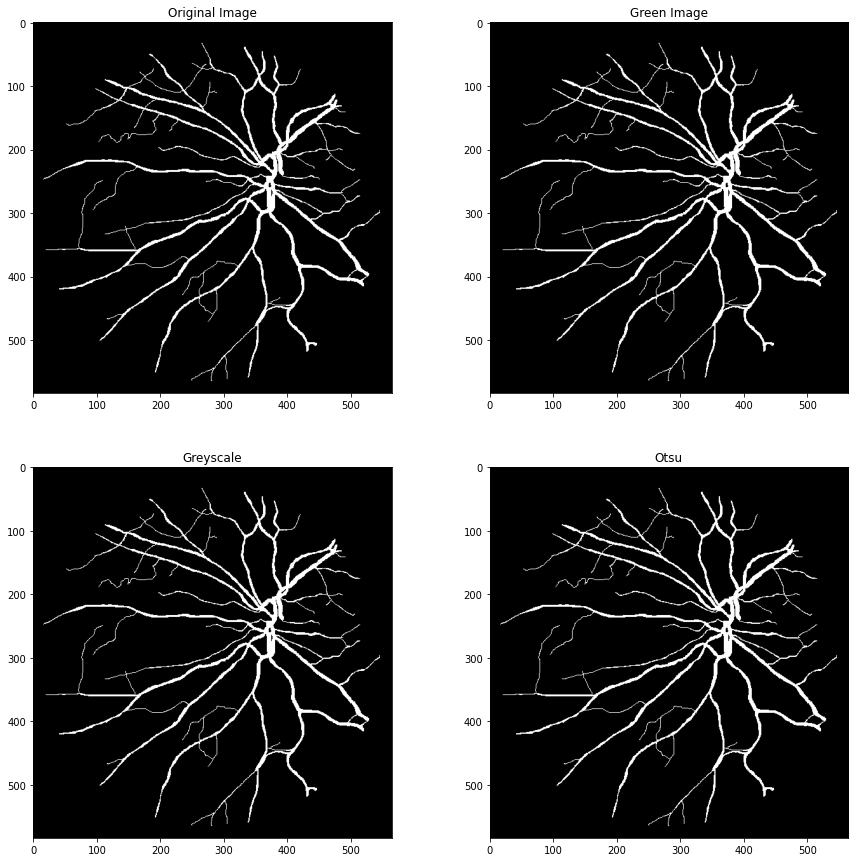

 55%|█████▌    | 11/20 [00:09<00:07,  1.23it/s]

D:\Data sets\DRIVE\training\1st_manual\32_manual1.gif


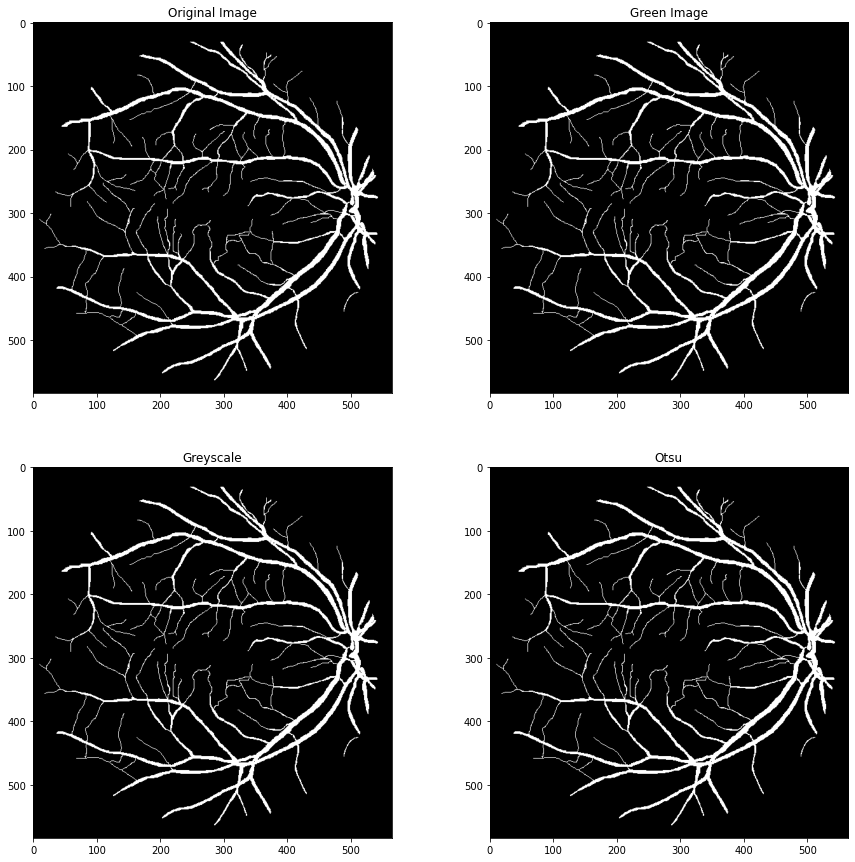

 60%|██████    | 12/20 [00:09<00:06,  1.21it/s]

D:\Data sets\DRIVE\training\1st_manual\33_manual1.gif


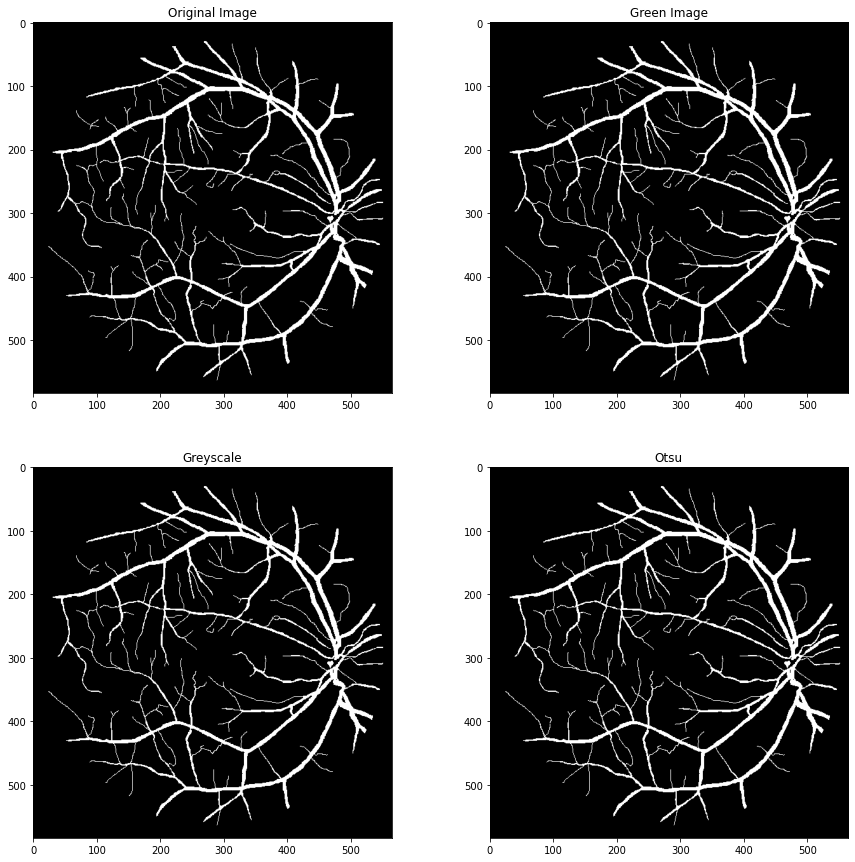

 65%|██████▌   | 13/20 [00:10<00:05,  1.22it/s]

D:\Data sets\DRIVE\training\1st_manual\34_manual1.gif


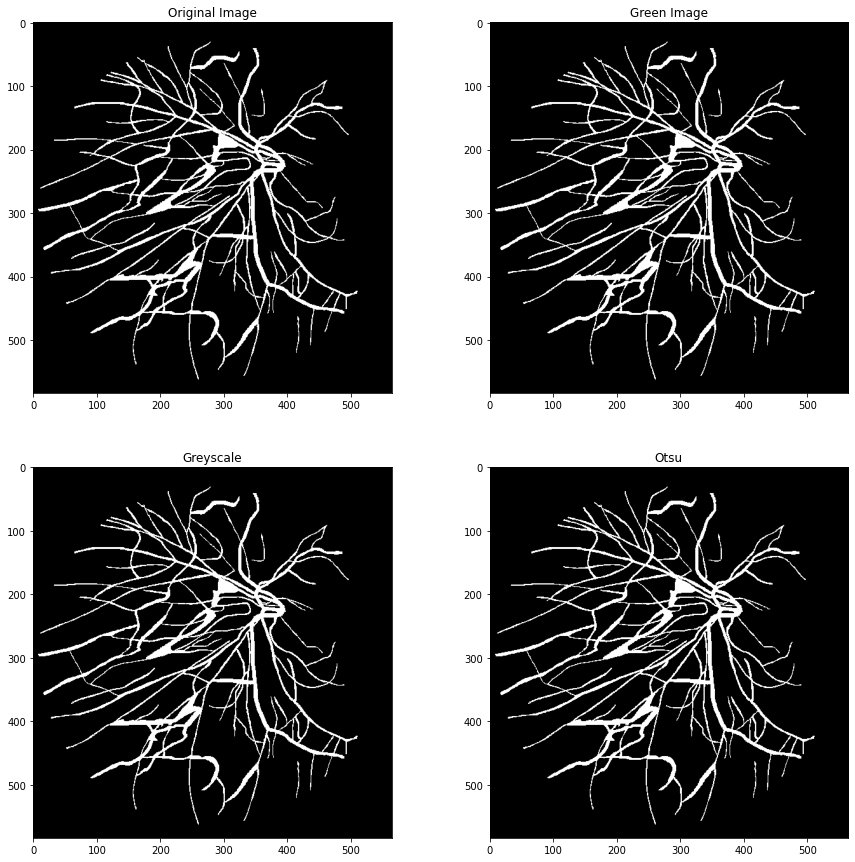

 70%|███████   | 14/20 [00:11<00:04,  1.22it/s]

D:\Data sets\DRIVE\training\1st_manual\35_manual1.gif


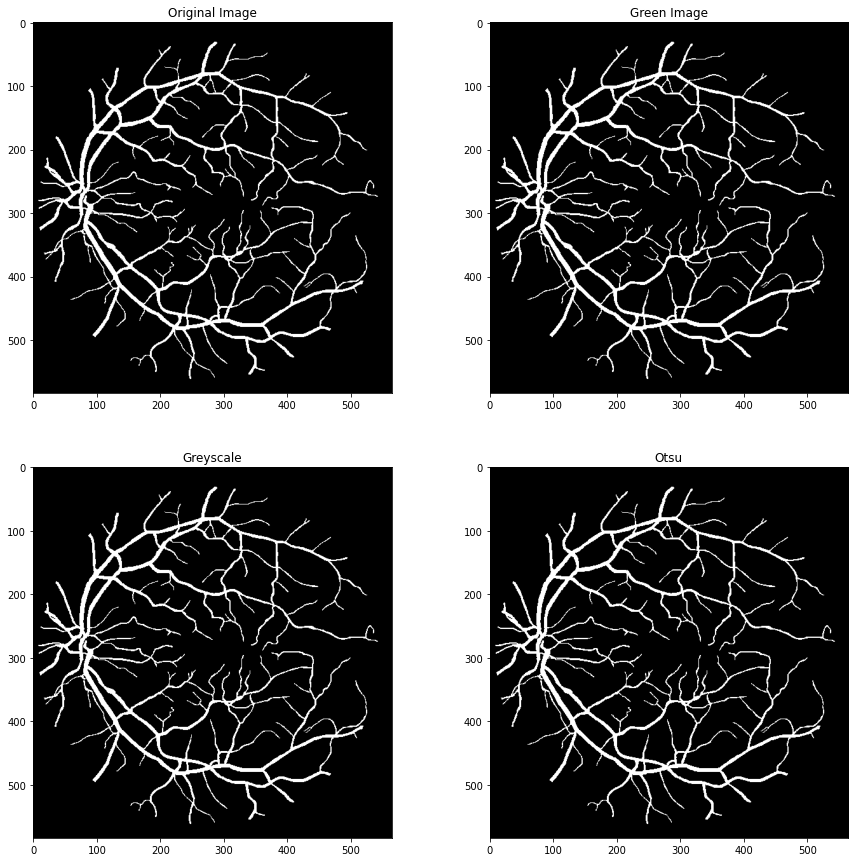

 75%|███████▌  | 15/20 [00:12<00:04,  1.23it/s]

D:\Data sets\DRIVE\training\1st_manual\36_manual1.gif


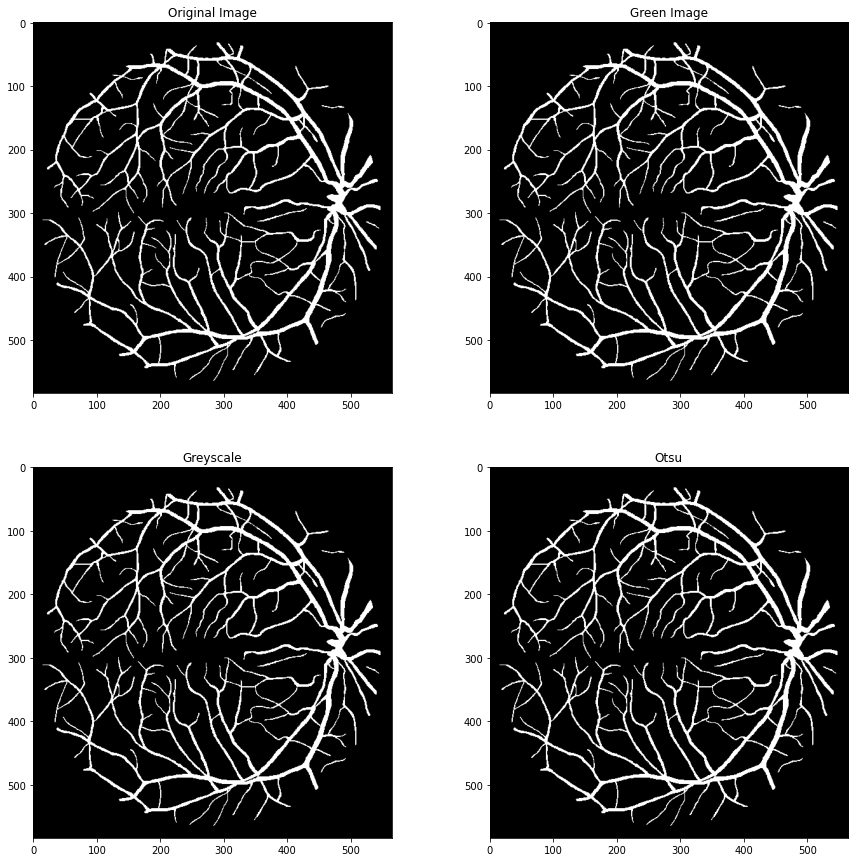

 80%|████████  | 16/20 [00:13<00:03,  1.21it/s]

D:\Data sets\DRIVE\training\1st_manual\37_manual1.gif


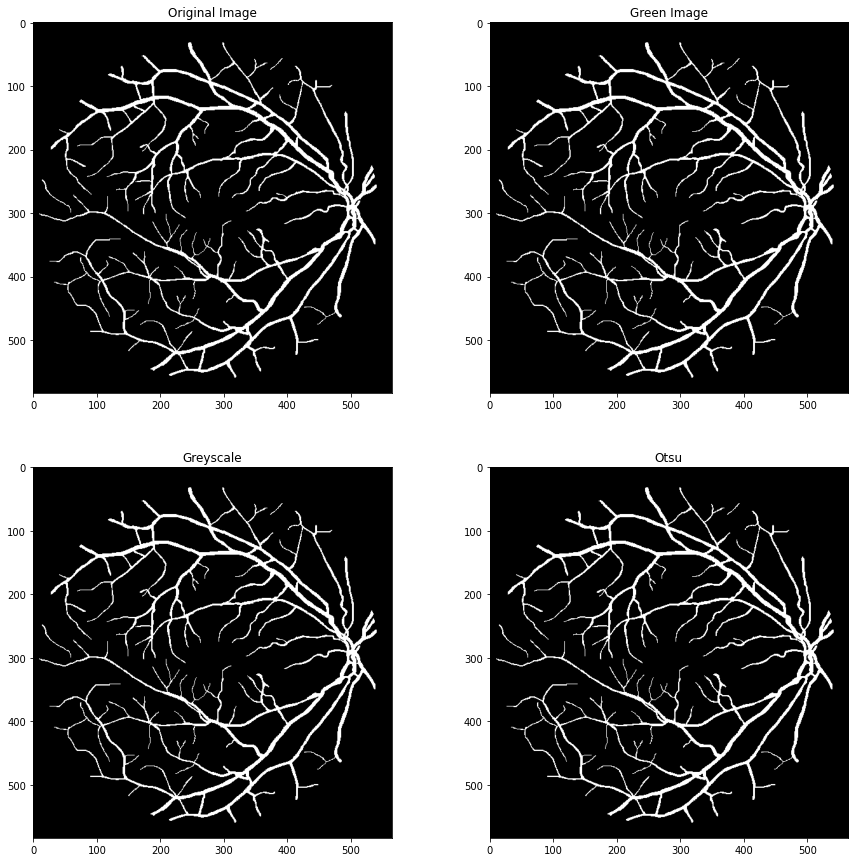

 85%|████████▌ | 17/20 [00:14<00:02,  1.23it/s]

D:\Data sets\DRIVE\training\1st_manual\38_manual1.gif


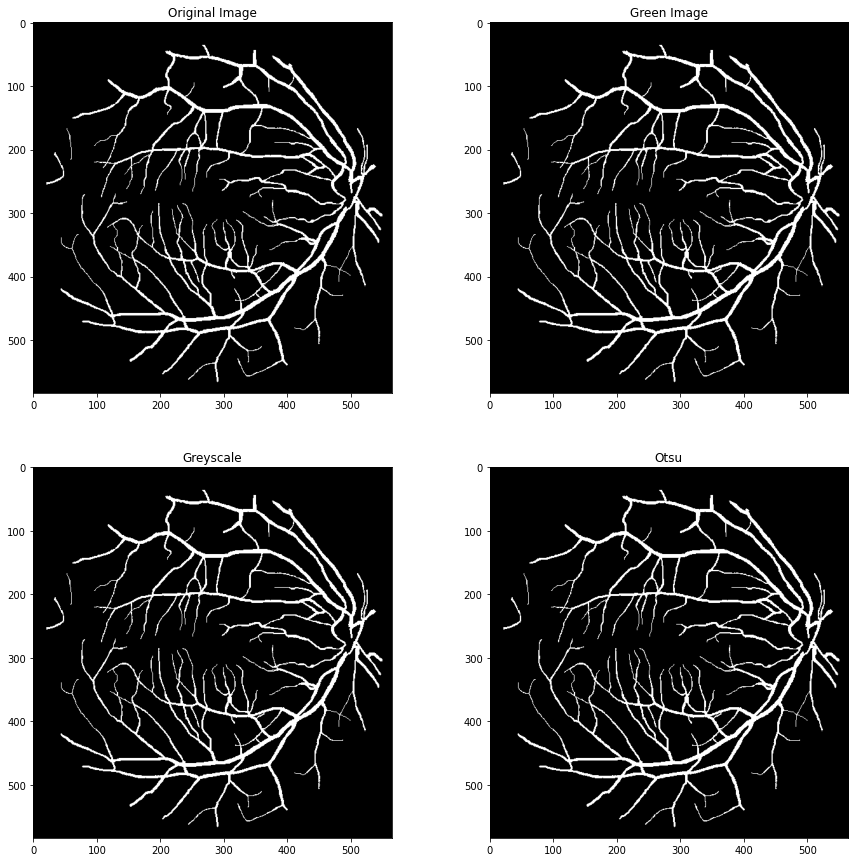

 90%|█████████ | 18/20 [00:14<00:01,  1.24it/s]

D:\Data sets\DRIVE\training\1st_manual\39_manual1.gif


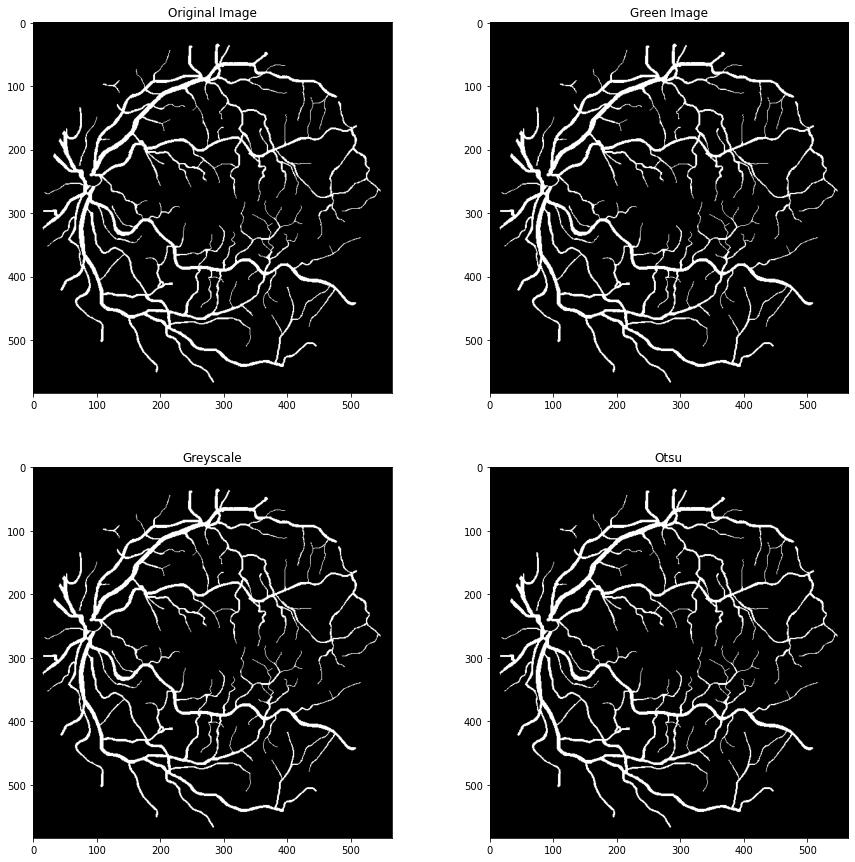

 95%|█████████▌| 19/20 [00:15<00:00,  1.25it/s]

D:\Data sets\DRIVE\training\1st_manual\40_manual1.gif


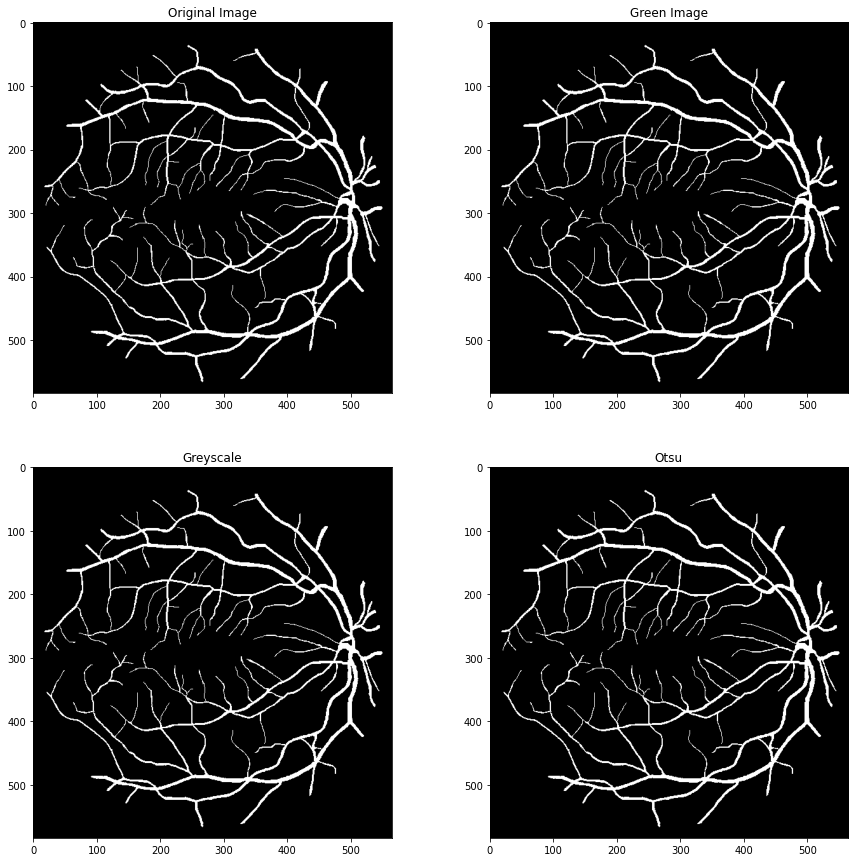

100%|██████████| 20/20 [00:16<00:00,  1.22it/s]

In [9]:
for _id in tqdm(range(len(gt_ids))):

    gt_image = gt_ids[_id]
    
    gt_path = train_path + "\\1st_manual\\" + gt_image
    print(gt_path)
    
    gtImg = gtImageDis(gt_path)
    gtGreen = gtImg[:,:,1]
    gtGray = cv2.cvtColor(gtImg, cv2.COLOR_BGR2GRAY)
    
    thresh = threshold_otsu(gtGray)
    th.append(thresh)
    gtBin = gtGray > thresh
    
    Title = ["Original Image", "Green Image", "Greyscale", "Otsu"]
    Image = [gtImg, gtGreen, gtGray, gtBin]
    
    fig = plt.figure(figsize=(15, 15))
    for i in range(4):
        fig.add_subplot(2, 2, i+1)
        plt.imshow(Image[i], cmap = "gray")
        plt.axis('on')
        plt.title(Title[i])
    plt.show()
    print("="*100)
    


In [10]:
th

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
th_mean = 0

# Changing the Input Images

In [12]:
gt_path

'D:\\Data sets\\DRIVE\\training\\1st_manual\\40_manual1.gif'

(584, 565)


Text(0.5, 1.0, 'Simple Binary Image')

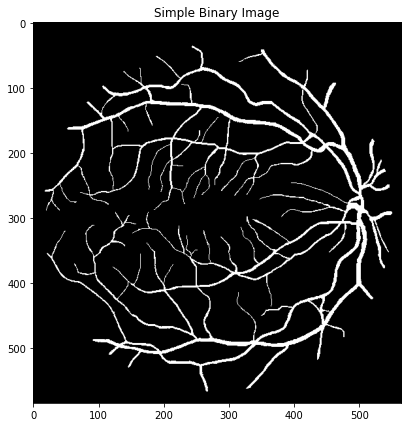

In [13]:
gtImg = gtImageDis(gt_path)
gtGray = cv2.cvtColor(gtImg, cv2.COLOR_BGR2GRAY)

thresh = 0

binary = gtGray > thresh
print(binary.shape)
plt.figure(figsize=(7, 7))
plt.imshow(binary, cmap = "gray")
plt.axis('on')
plt.title("Simple Binary Image")

## Calculating The Padding

In [14]:
req_size = 128 * 5
req_size

640

In [15]:
height_inc = 640 - 584
width_inc = 640 - 565
height_inc, width_inc

(56, 75)

## Padding

(640, 640)


Text(0.5, 1.0, 'Padded Binary Image')

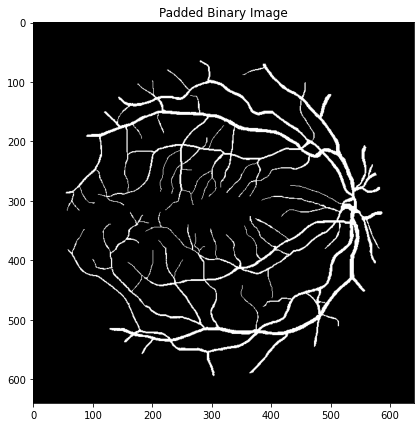

In [16]:
# border widths; I set them all to 150
top, bottom = [28] * 2
left, right = [37,38]
gtPad = cv2.copyMakeBorder(gtGray, top, bottom, left, right, cv2.BORDER_CONSTANT, value= 0)

print(gtPad.shape)
plt.figure(figsize=(7, 7))
plt.imshow(gtPad, cmap = "gray")
plt.axis('on')
plt.title("Padded Binary Image")

# Slicing

## Type 1

In [17]:
lines = [127, 255, 383, 511]

(640, 640)


Text(0.5, 1.0, 'Padded Binary Image')

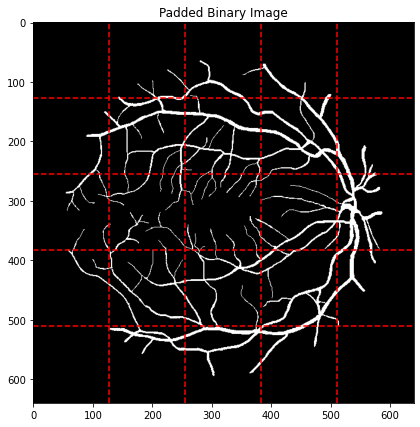

In [18]:
plt.figure(figsize=(7, 7))
plt.imshow(gtPad, cmap = "gray")

for i in lines:
    plt.axhline(y=i, color='r', linestyle='--')
    plt.axvline(x=i, color='r', linestyle='--')
    
print(gtPad.shape)
plt.title("Padded Binary Image")

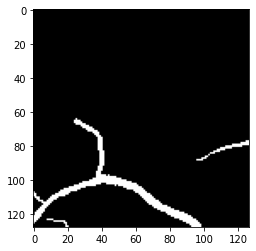

In [20]:
crop = gtPad[:128,256:383]
plt.imshow(crop, cmap = "gray")

In [21]:
img_width = 128
img_height = 128
img_channels = 1

In [35]:
X_train = np.zeros((41, img_height, img_width, img_channels), dtype=np.uint8)

In [36]:
top = left = 0
bottom = right = 128
k = 0
for i in range(5):
    for j in range(5):
        crop = gtPad[top:bottom,left:right]
        X_train[k] =  crop.reshape(128,128,1)
        k += 1
        left += 128
        right += 128
    left = 0
    right = 128
    top += 128
    bottom += 128

In [37]:
import matplotlib.pyplot as plt
from skimage.io import imshow

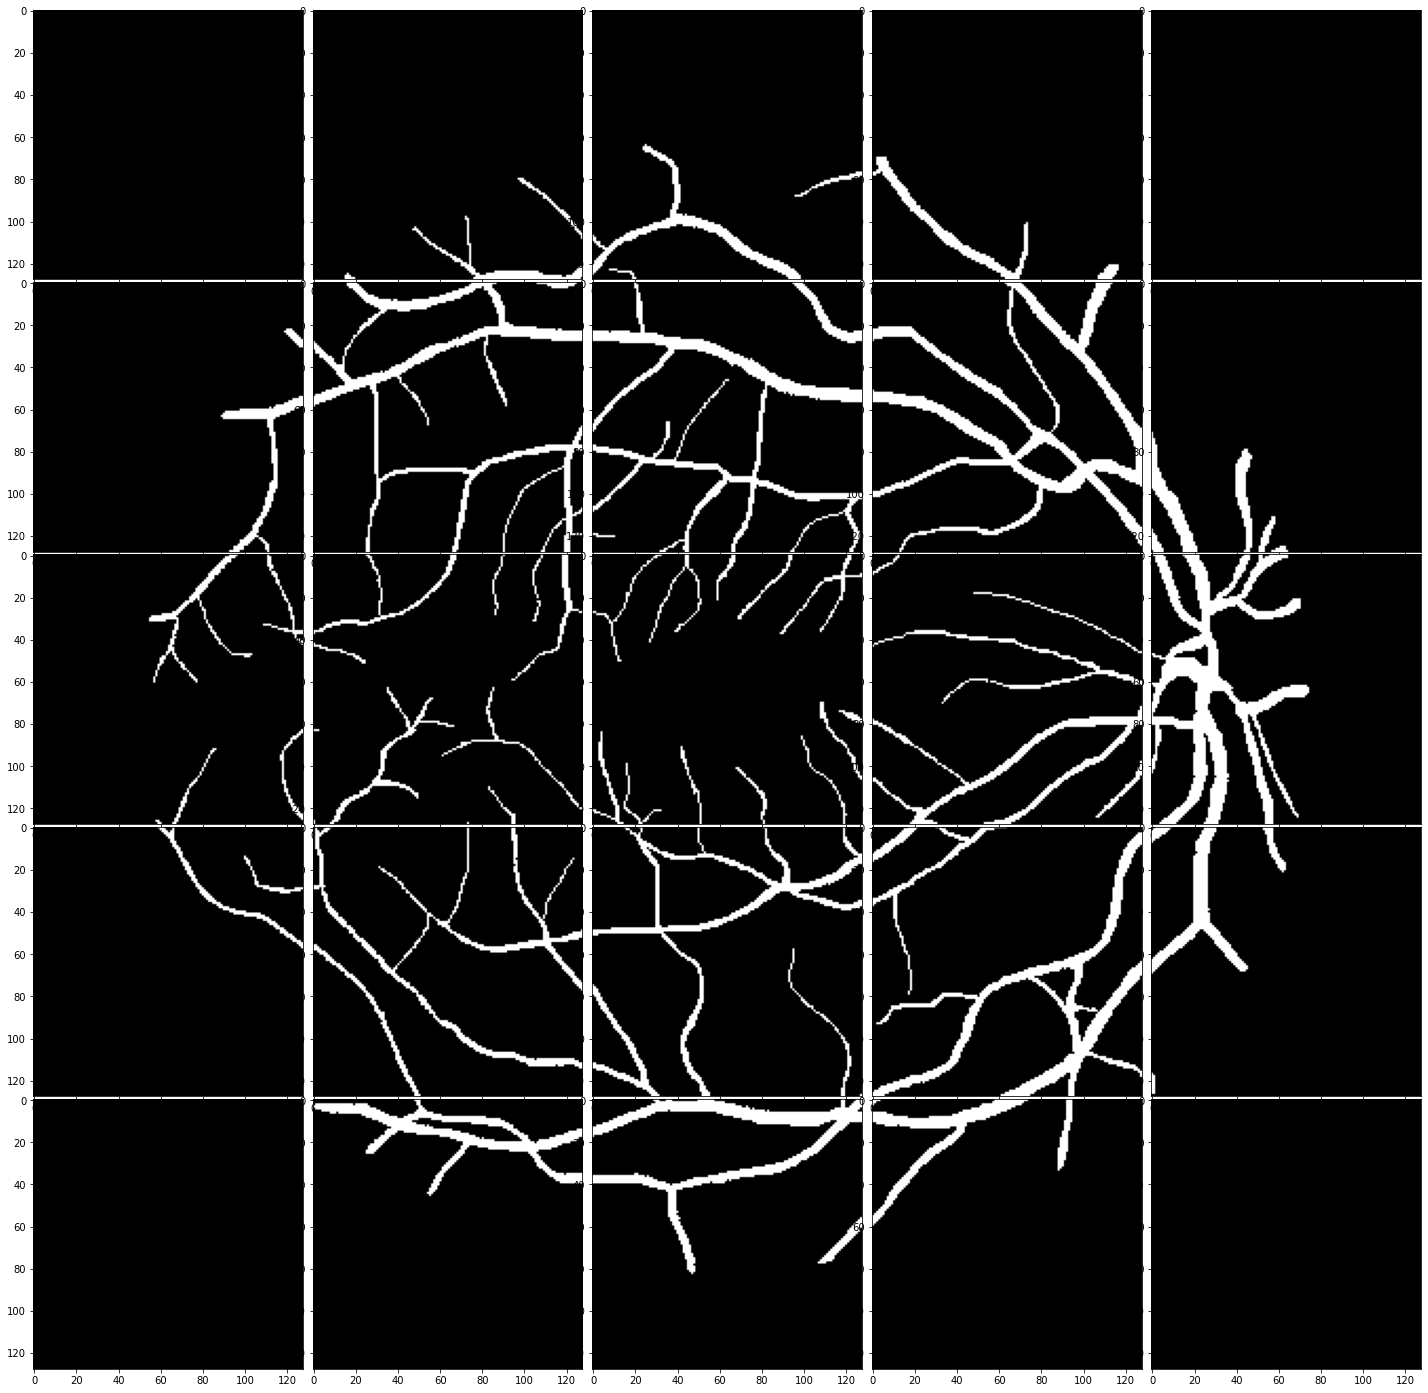

In [53]:
fig = plt.figure(figsize=(25, 25))
for i in range(25):
    plt.subplots_adjust(hspace=0.01, wspace=0.01)
    fig.add_subplot(5, 5, i+1)
    plt.imshow(X_train[i], cmap = "gray")
    plt.axis('on')
plt.show()


## Type 2

(640, 640)


Text(0.5, 1.0, 'Padded Binary Image')

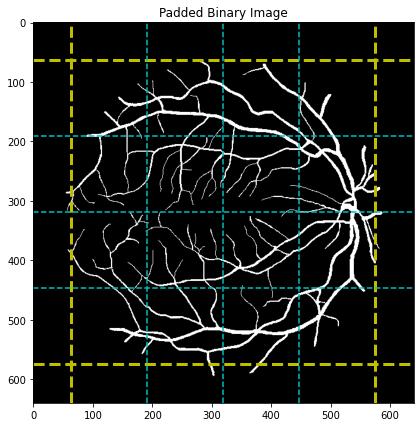

In [39]:
plt.figure(figsize=(7, 7))
plt.imshow(gtPad, cmap = "gray")

for bh in [63, 575]:
    plt.axhline(y=bh, color='y', linestyle='--', linewidth=3)
    plt.axvline(x=bh, color='y', linestyle='--', linewidth=3)
    
for i in lines[:-1]:
    plt.axhline(y=i + 64, color='c', linestyle='--')
    plt.axvline(x=i + 64, color='c', linestyle='--')
    
print(gtPad.shape)
plt.title("Padded Binary Image")

In [40]:
k

25

In [41]:
top = left = 63
bottom = right = 191
k = 25
for i in range(4):
    for j in range(4):
        crop = gtPad[top:bottom,left:right]
        X_train[k] =  crop.reshape(128,128,1)
        k += 1
        left += 128
        right += 128
    left = 63
    right = 191
    top += 128
    bottom += 128

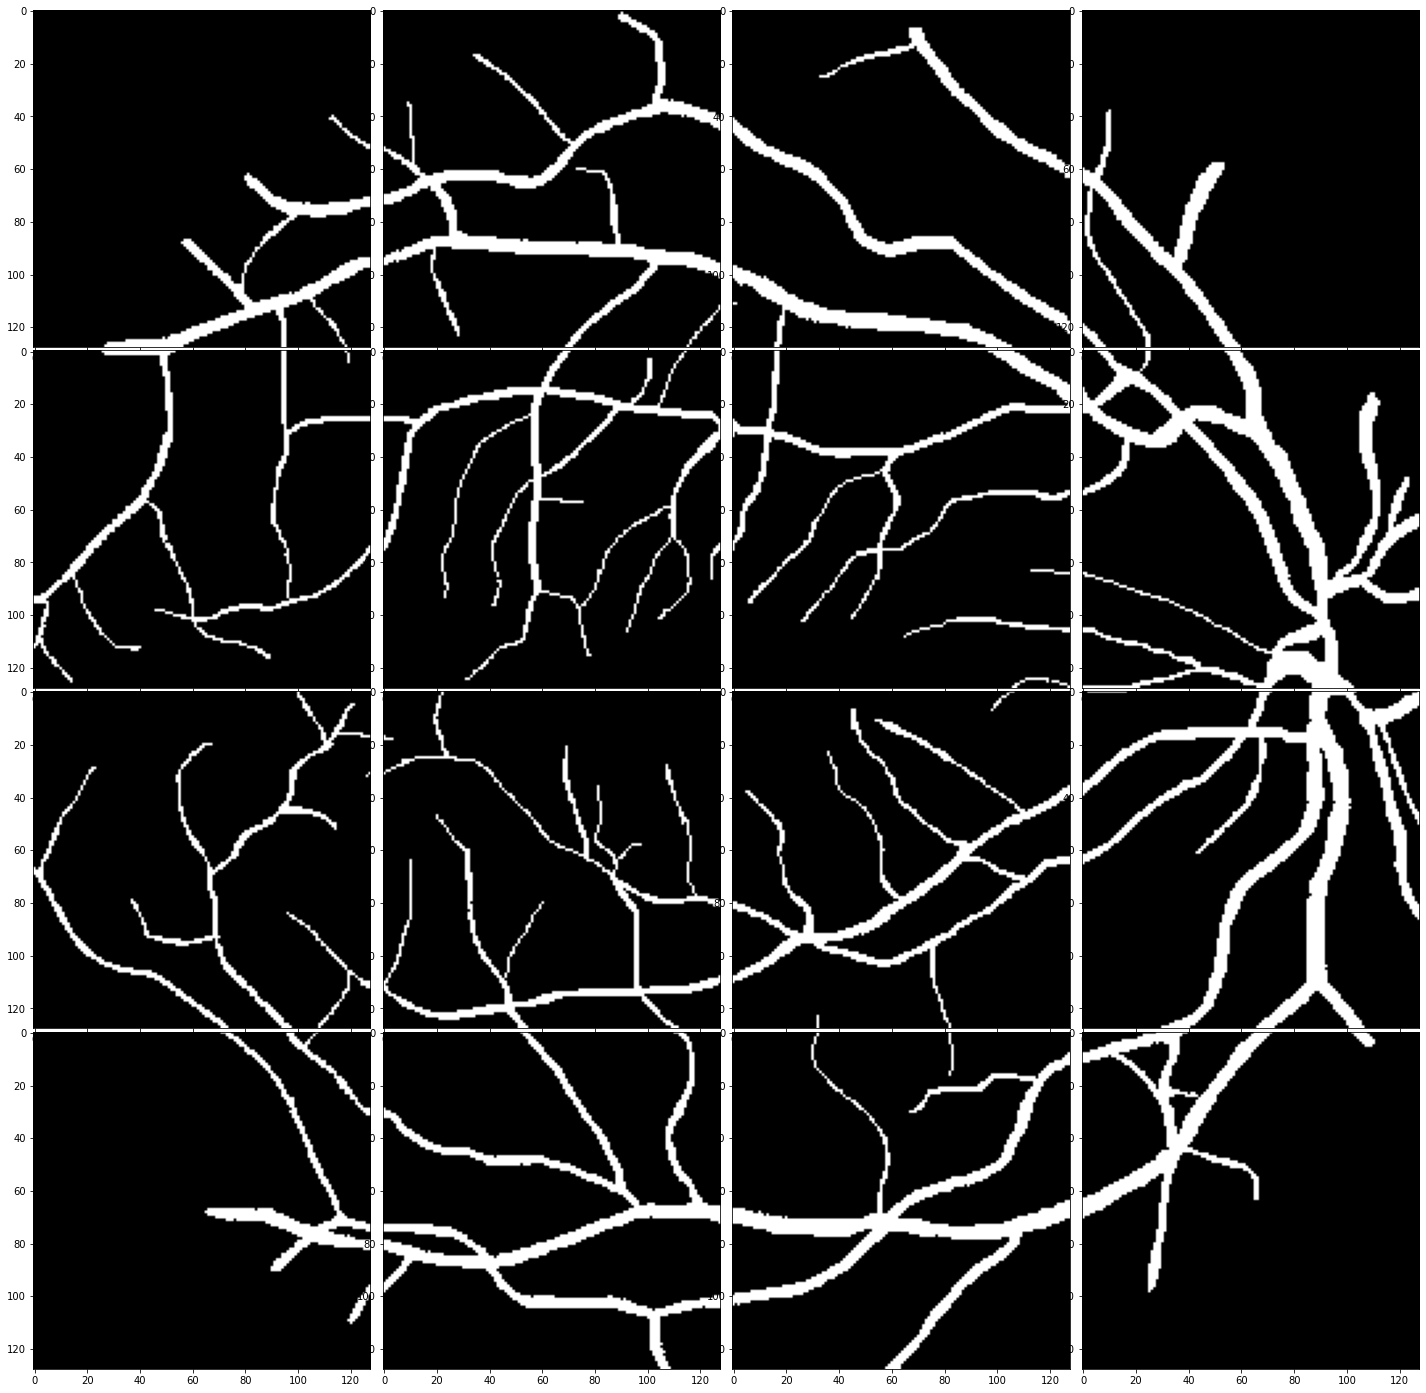

In [54]:
fig = plt.figure(figsize=(25, 25))
for i in range(16):
    plt.subplots_adjust(hspace=0.01, wspace=0.01)
    fig.add_subplot(4, 4, i+1)
    p = 25 + i
    plt.imshow(X_train[p], cmap = "gray")
    plt.axis('on')
plt.show()